# NASA Exoplanet Dataset Exploration and Visualization

This is a subset of the **Planetary Systems Composite Parameters** dataset published by NASA, representing all rows and only a subset of the columns. 
After looking at the dataset, the following are questions I want to try to answer about exoplanets:
- What are the methods of discovering exoplanets, and which of these is the most common?
- Which methods are most/least reliable?
- Up to 85% of stars are in binary or multi-star systems, what percentage of discovered exoplanets are part of these systems?
- Is there a relationship between planet mass and planet radius?

## Importing libraries and loading data

In [278]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [279]:
planets_df = pd.read_csv("planet_data.csv")

In [280]:
planets_df.head()

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_controv_flag,...,pl_bmasse,pl_eqt,st_spectype,st_teff,st_rad,st_mass,st_logg,st_age,sy_dist,sy_plx
0,11 Com b,11 Com,2,1,0,0,Radial Velocity,2007,Xinglong Station,0,...,4914.89849,NaN,G8 III,4874.0,13.76,2.09,2.45,NaN,93.1846,10.71040
1,11 UMi b,11 UMi,1,1,0,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,...,4684.81420,NaN,K4 III,4213.0,29.79,2.78,1.93,1.56,125.3210,7.95388
2,14 And b,14 And,1,1,0,0,Radial Velocity,2008,Okayama Astrophysical Observatory,0,...,1131.15130,NaN,K0 III,4888.0,11.55,1.78,2.55,4.50,75.4392,13.22890
3,14 Her b,14 Her,1,2,0,0,Radial Velocity,2002,W. M. Keck Observatory,0,...,2559.47216,NaN,K0 V,5338.0,0.93,0.91,4.45,3.90,17.9323,55.73630
4,16 Cyg B b,16 Cyg B,3,1,0,0,Radial Velocity,1996,Multiple Observatories,0,...,565.73740,NaN,G3 V,5750.0,1.13,1.08,4.36,7.40,21.1397,47.27540


## Data Cleaning

Some of the exoplanet data is marked as 'controversial', meaning the existence of the planet has been questioned in the literature. I am going to separate the controversial data from the rest.

In [281]:
planets_df["pl_controv_flag"].value_counts()

0    5536
1      30
Name: pl_controv_flag, dtype: int64

In [282]:
planets_df_controv = planets_df[planets_df["pl_controv_flag"] == 1]
planets_df_controv.shape

(30, 23)

In [283]:
df_planet = planets_df[planets_df["pl_controv_flag"] == 0]
df_planet.shape

(5536, 23)

In [284]:
# Dropping duplicates (if any)
df_planet = df_planet.drop_duplicates()

In [285]:
# Dropping columns I will not be using
df_planet = df_planet.drop(columns = ["pl_orbsmax",
                                      "st_spectype",
                                      "st_teff",
                                      "st_rad",
                                      "st_mass",
                                      "st_logg",
                                      "st_age",
                                      "pl_eqt",
                                      "sy_plx"])

In [286]:
df_planet["sy_mnum"].value_counts()

0    5536
Name: sy_mnum, dtype: int64

In [287]:
# Dropping Number of Moons column as they are all 0
df_planet = df_planet.drop(columns = "sy_mnum")

The rest of the project will focus primarily on the uncontroversial data.

In [288]:
# Renaming columns to be more informative and readable

df_planet = df_planet.rename(columns = {
    "pl_name": "Planet Name",
    "hostname": "Host Name",
    "sy_snum": "Num Stars",
    "sy_pnum": "Num Planets",
    "cb_flag": "Circumbinary",
    "discoverymethod": "Discovery Method",
    "disc_year": "Discovery Year",
    "disc_facility": "Discovery Facility",
    "pl_controv_flag": "Controversial",
    "pl_orbper": "Orbital Period (years)",
    "pl_rade": "Planet Radius (Earth Radii)",
    "pl_bmasse": "Planet Mass (Earth Mass)",
    "sy_dist": "Distance (lightyear)",
})

In [289]:
# Correcting data types

df_planet["Circumbinary"] = df_planet["Circumbinary"].astype("bool")
df_planet["Planet Name"] = df_planet["Planet Name"].astype("string")
df_planet["Host Name"] = df_planet["Host Name"].astype("string")
df_planet["Discovery Method"] = df_planet["Discovery Method"].astype("category")
df_planet["Discovery Facility"] = df_planet["Discovery Facility"].astype("string")

In [290]:
# Changing the units of some columns to be easier to understand (parsec -> lightyear, days -> years)

df_planet["Distance (lightyear)"] *= 3.261563
df_planet["Orbital Period (years)"] /= 365.2422

### Dealing with Outliers

The data in this dataset has been confirmed to be accurate and uncontroversial. As a result, although there are datapoints that are outliers, replacing them would not be appropriate.

There is some controversy as to what the most massive exoplanet discovered is, as the border between the most massive exoplanets and the least massive brown dwarf stars is not well defined. NASA does however classify even the most massive record in this dataset, "Kepler 297-d" (discovered in 2023) as a confirmed exoplanet. Nevertheless, I have included the distribution of masses with outliers excluded so that the distribution of masses can be better understood.

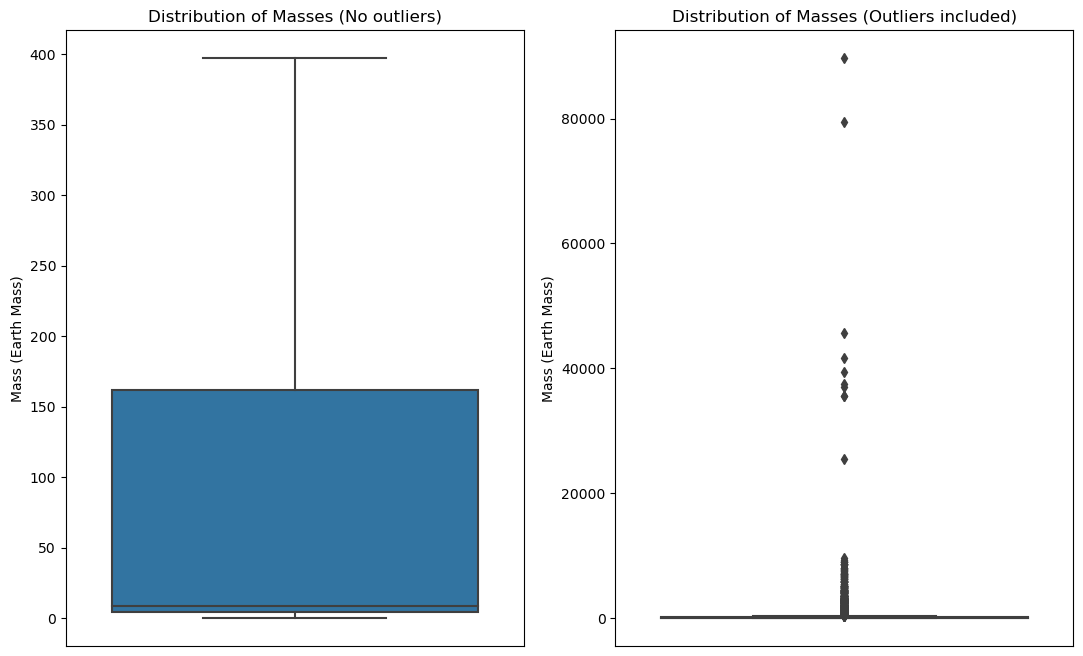

In [291]:
masses = df_planet["Planet Mass (Earth Mass)"]
plt.figure(figsize=(13, 8))

plt.subplot(1, 2, 1)
sns.boxplot(masses, showfliers = False)
plt.title("Distribution of Masses (No outliers)")
plt.ylabel("Mass (Earth Mass)")
plt.xticks([])

plt.subplot(1, 2, 2)
sns.boxplot(masses)
plt.title("Distribution of Masses (Outliers included)")
plt.ylabel("Mass (Earth Mass)")
plt.xticks([])

plt.show()

In [292]:
outlier_df = df_planet[(df_planet["Planet Mass (Earth Mass)"] > 10000)]
outlier_df

# These are the 10 planets in the dataset which appear to be outliers (based on their mass compared to the estimated maximum 
# mass of planets), but have been confirmed as exoplanets.

,Planet Name,Host Name,Num Stars,Num Planets,Circumbinary,Discovery Method,Discovery Year,Discovery Facility,Controversial,Orbital Period (years),Planet Radius (Earth Radii),Planet Mass (Earth Mass),Distance (lightyear)
1749,K2-52 b,K2-52,1,1,False,Transit,2016,K2,0,0.009679,18.00,45700.0,3386.839635
3273,Kepler-1979 b,Kepler-1979,1,1,False,Transit,2023,Kepler,0,0.050674,29.33,79500.0,3510.322410
3598,Kepler-297 d,Kepler-297,1,3,False,Transit,2023,Kepler,0,0.410738,32.60,89700.0,2257.458215
3995,Kepler-470 b,Kepler-470,1,1,False,Transit,2016,Kepler,0,0.067542,14.44,35600.0,3032.637155
3996,Kepler-471 b,Kepler-471,1,1,False,Transit,2016,Kepler,0,0.013729,14.96,37000.0,4075.029428
4014,Kepler-485 b,Kepler-485,1,1,False,Transit,2016,Kepler,0,0.008880,14.41,35500.0,3721.280305
4018,Kepler-488 b,Kepler-488,1,1,False,Transit,2016,Kepler,0,0.008545,15.79,39400.0,3735.402873
4026,Kepler-493 b,Kepler-493,1,1,False,Transit,2016,Kepler,0,0.008224,15.13,37500.0,5693.938839
4336,Kepler-718 b,Kepler-718,1,1,False,Transit,2016,Kepler,0,0.005619,16.56,41600.0,4247.631342
4912,PH2 b,PH2,1,1,False,Transit,2013,Kepler,0,0.773529,10.12,25426.4,1121.530838


<Axes: >

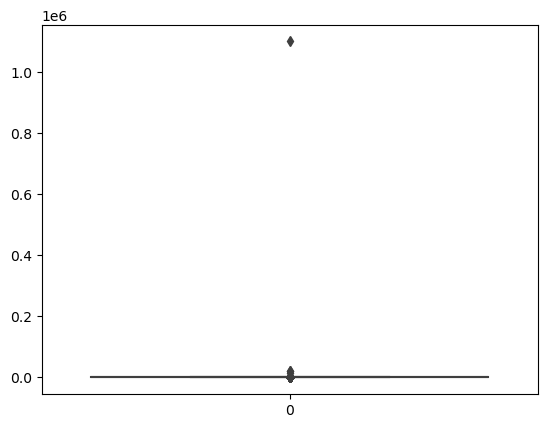

In [303]:
distances = df_planet["Orbital Period (years)"]
sns.boxplot(distances, showfliers = True)

Although COCONUTS-2b, the planet with the longest orbital period (1.1 million years), appears to be a clear outlier, the data for it has been confirmed by NASA, and COCONUTS-2b holds many such records. Therefore, I will not alter the value of its orbital period.

### Dealing with Missing Values

In [260]:
df_planet.isnull().sum()

Planet Name                      0
Host Name                        0
Num Stars                        0
Num Planets                      0
Circumbinary                     0
Discovery Method                 0
Discovery Year                   0
Discovery Facility               0
Controversial                    0
Orbital Period (days)          241
Planet Radius (Earth Radii)     14
Planet Mass (Earth Mass)        20
Distance (lightyear)            21
dtype: int64

#### Missing Orbital Period values

Some planets are "rogue planets" and do not orbit a star. They therefore do not have an orbital period so their null value in the orbital period field is justified. I will therefore not deal with missing values for this field.

#### Missing Distance Values

In [456]:
df_planet[df_planet["Distance (lightyear)"].isnull()].head(10)

,Planet Name,Host Name,Num Stars,Num Planets,Circumbinary,Discovery Method,Discovery Year,Discovery Facility,Controversial,Orbital Period (years),Planet Radius (Earth Radii),Planet Mass (Earth Mass),Distance (lightyear)
79,CFHTWIR-Oph 98 b,CFHTWIR-Oph 98 A,1,1,False,Imaging,2021,Hubble Space Telescope,0,22012.790417,20.849,2479.06157,NaN
2881,Kepler-1676 b,Kepler-1676,1,1,False,Transit,2020,Kepler,0,0.081924,3.377,11.30000,NaN
2960,Kepler-1737 b,Kepler-1737,1,1,False,Transit,2021,Kepler,0,0.176917,5.395,25.10000,NaN
2984,Kepler-1756 b,Kepler-1756,1,1,False,Transit,2021,Kepler,0,0.006450,1.472,2.77000,NaN
2992,Kepler-1760 b,Kepler-1760,1,1,False,Transit,2021,Kepler,0,0.104933,2.290,5.86000,NaN
3034,Kepler-1795 b,Kepler-1795,1,1,False,Transit,2021,Kepler,0,0.036579,1.663,3.40000,NaN
3060,Kepler-1813 b,Kepler-1813,1,1,False,Transit,2021,Kepler,0,0.007716,1.413,2.58000,NaN
3113,Kepler-1855 b,Kepler-1855,1,1,False,Transit,2021,Kepler,0,0.001991,1.216,1.96000,NaN
3190,Kepler-1910 b,Kepler-1910,1,1,False,Transit,2021,Kepler,0,0.015575,1.184,1.78000,NaN
3234,Kepler-1945 b,Kepler-1945,1,1,False,Transit,2021,Kepler,0,0.016647,1.289,2.21000,NaN


In [462]:
# To 

missing_values_binary_mask = df_planet["Distance (lightyear)"].isnull()
existing_values_binary_mask = [not x for x in missing_values_binary_mask]
distance_vals = df_planet.loc[existing_values_binary_mask, "Distance (lightyear)"]
distance_samples = np.random.choice(distance_vals, size=sum(missing_values_binary_mask), replace=True)
df_planet.loc[missing_values_binary_mask, "Distance (lightyear)"] = distance_samples

In [463]:
df_planet.isnull().sum()

Planet Name                      0
Host Name                        0
Num Stars                        0
Num Planets                      0
Circumbinary                     0
Discovery Method                 0
Discovery Year                   0
Discovery Facility               0
Controversial                    0
Orbital Period (years)         241
Planet Radius (Earth Radii)     14
Planet Mass (Earth Mass)        20
Distance (lightyear)             0
dtype: int64

## Exploratory Data Analysis

In [263]:
df_planet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5536 entries, 0 to 5565
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Planet Name                  5536 non-null   string  
 1   Host Name                    5536 non-null   string  
 2   Num Stars                    5536 non-null   int64   
 3   Num Planets                  5536 non-null   int64   
 4   Circumbinary                 5536 non-null   bool    
 5   Discovery Method             5536 non-null   category
 6   Discovery Year               5536 non-null   int64   
 7   Discovery Facility           5536 non-null   string  
 8   Controversial                5536 non-null   int64   
 9   Orbital Period (days)        5295 non-null   float64 
 10  Planet Radius (Earth Radii)  5522 non-null   float64 
 11  Planet Mass (Earth Mass)     5516 non-null   float64 
 12  Distance (lightyear)         5515 non-null   float64 
dtypes: 

In [264]:
df_planet.describe()

,Num Stars,Num Planets,Discovery Year,Controversial,Orbital Period (days),Planet Radius (Earth Radii),Planet Mass (Earth Mass),Distance (lightyear)
count,5536.000000,5536.000000,5536.000000,5536.0,5.295000e+03,5522.000000,5516.000000,5515.000000
mean,1.102059,1.768425,2016.153179,0.0,8.076239e+04,5.687996,439.972461,2269.538108
std,0.340926,1.148513,4.503097,0.0,5.527079e+06,5.249558,2376.373986,3578.379514
min,1.000000,1.000000,1992.000000,0.0,9.070629e-02,0.310000,0.020000,4.243913
25%,1.000000,1.000000,2014.000000,0.0,4.474399e+00,1.780000,4.027500,371.050084
50%,1.000000,1.000000,2016.000000,0.0,1.156105e+01,2.775500,8.700000,1348.525838
75%,1.000000,2.000000,2020.000000,0.0,4.139416e+01,11.850500,162.093300,2782.755767
max,4.000000,8.000000,2023.000000,0.0,4.020000e+08,33.600000,89700.000000,27723.285500


C:\Users\Rohan Patel\AppData\Local\Temp\ipykernel_19048\3580778139.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_planet.corr(), annot=True, cmap='coolwarm')


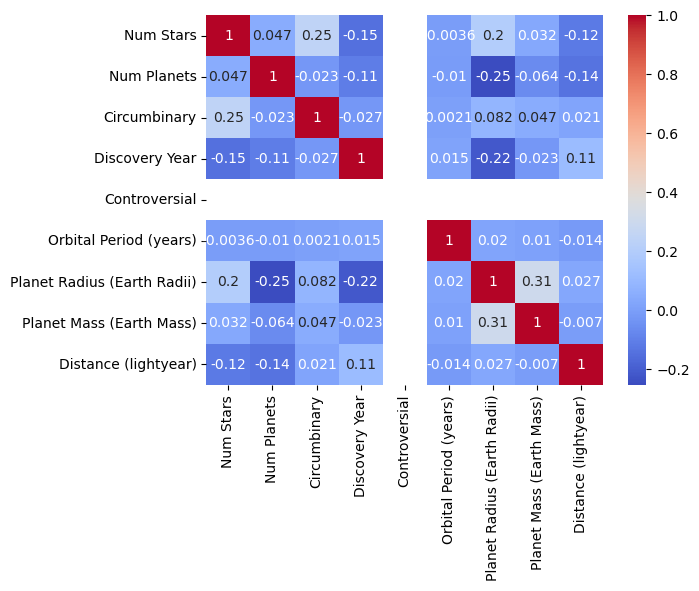

In [371]:
sns.heatmap(df_planet.corr(), annot=True, cmap='coolwarm')
plt.show()

### Discovery Statistics

#### Discovery Methods

In [230]:
disc_methods = df_planet["Discovery Method"].value_counts()
disc_methods

Transit                          4144
Radial Velocity                  1062
Microlensing                      205
Imaging                            66
Transit Timing Variations          27
Eclipse Timing Variations          15
Pulsar Timing                       7
Orbital Brightness Modulation       4
Astrometry                          3
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: Discovery Method, dtype: int64

There are 11 discovery methods in this dataset.

In [26]:
100* disc_methods/sum(disc_methods)

Transit                          74.855491
Radial Velocity                  19.183526
Microlensing                      3.703035
Imaging                           1.192197
Transit Timing Variations         0.487717
Eclipse Timing Variations         0.270954
Pulsar Timing                     0.126445
Orbital Brightness Modulation     0.072254
Astrometry                        0.054191
Pulsation Timing Variations       0.036127
Disk Kinematics                   0.018064
Name: Discovery Method, dtype: Float64

In [27]:
controv_disc_methods = planets_df_controv["discoverymethod"].value_counts()
controv_disc_methods

Radial Velocity                  13
Transit                           6
Orbital Brightness Modulation     5
Imaging                           3
Eclipse Timing Variations         2
Transit Timing Variations         1
Name: discoverymethod, dtype: int64

In [28]:
controv_disc_counts = [6, 13, 0, 3, 1, 2, 0, 5, 0, 0, 0]

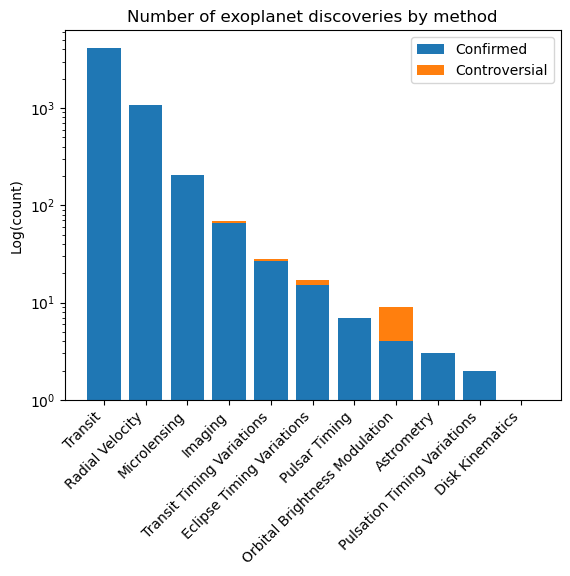

In [31]:
figure, axis = plt.subplots()
axis.bar(disc_methods.index, disc_methods, label = 'Confirmed')
axis.bar(disc_methods.index, controv_disc_counts, bottom = disc_methods, label = 'Controversial')
plt.yscale('log')

axis.set_ylabel('Log(count)')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Number of exoplanet discoveries by method')
plt.legend()

plt.show()

In [30]:
print(100*controv_disc_methods/disc_methods)

Astrometry                             NaN
Disk Kinematics                        NaN
Eclipse Timing Variations        13.333333
Imaging                           4.545455
Microlensing                           NaN
Orbital Brightness Modulation        125.0
Pulsar Timing                          NaN
Pulsation Timing Variations            NaN
Radial Velocity                   1.224105
Transit                           0.144788
Transit Timing Variations         3.703704
dtype: Float64


As shown above, the 'Transit' discovery method makes up the overwhelming majority of exoplanet discoveries at 74%. Combined with 'Radial Velocity', these two methods make up 94% of discoveries.

Orbital Brightness Modulation appears to be a very unreliable method of discovery, evidenced by the fact that more of these are controversial than uncontroversial. Eclipse timing variations are also fairly unreliable with a 13.3% controversial rate.

Microlensing, the third most common method of discovery, has no controversial datapoints - making it a very trustworthy method.

#### Discovery Year

In [438]:
discovery_years = df_planet["Discovery Year"].value_counts().sort_index()
year_list = df_planet["Discovery Year"].value_counts().sort_index().index
discovery_years_list = []
cumulative_list = []
total = 0

for year in year_list:
    discovery_years_list.append(discovery_years[year])
    
for i in discovery_years_list:
    total += i
    cumulative_list.append(total)
    
print(cumulative_list)

[2, 3, 4, 10, 16, 29, 45, 57, 86, 108, 135, 171, 202, 254, 319, 413, 510, 642, 781, 903, 1772, 1923, 3437, 3589, 3913, 4115, 4346, 4872, 5235, 5536]


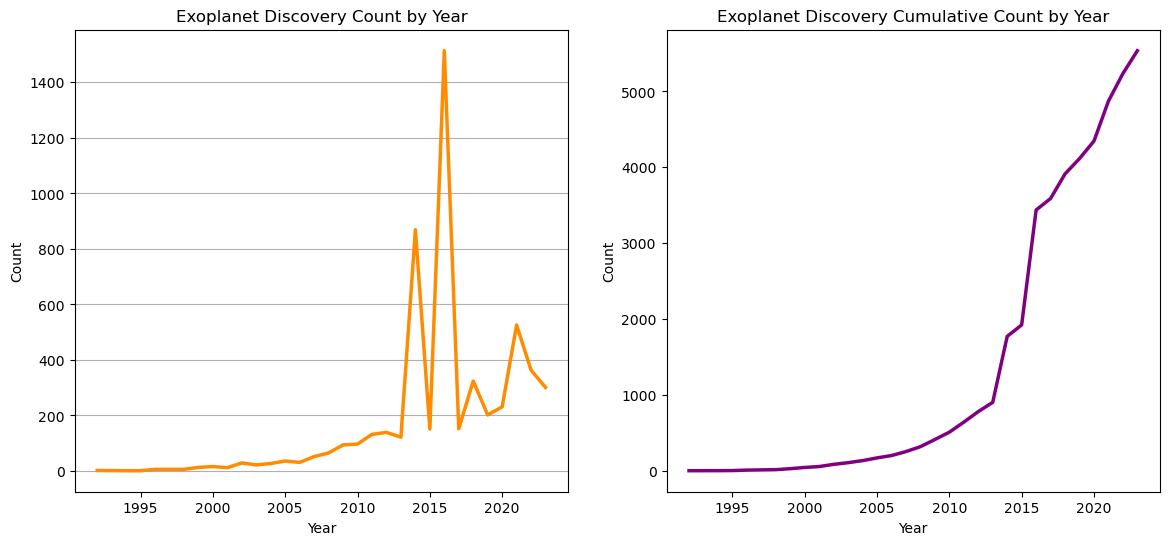

In [451]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.plot(discovery_years.index, discovery_years, linewidth = 2.5, color = 'darkorange')
plt.title("Exoplanet Discovery Count by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.gca().yaxis.grid(True)
#axis.set_axisbelow(True)

plt.subplot(1, 2, 2)
plt.plot(year_list, cumulative_list, linewidth = 2.5, color = 'purple')
plt.title("Exoplanet Discovery Cumulative Count by Year")
plt.xlabel("Year")
plt.ylabel("Count")

plt.show()

The first exoplanet was discovered in 1992. There is a general upward trend in the number of exoplanets discovered annually over the years, with big spikes in 2014 and 2016.

#### Discovery Facility

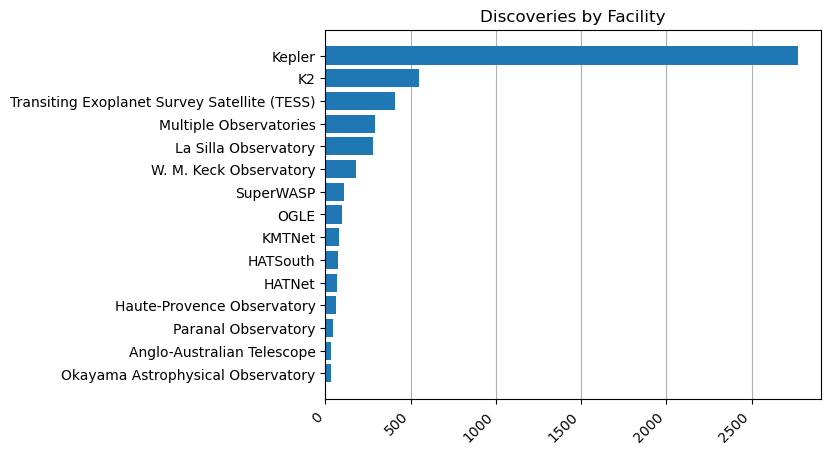

In [250]:
df_planet["Discovery Facility"].nunique()
facilities = df_planet["Discovery Facility"].value_counts().head(15)

figure, axis = plt.subplots()
plt.barh(facilities.index[::-1], facilities[::-1])
plt.xticks(rotation=45, ha = 'right')
plt.gca().xaxis.grid(True)
axis.set_axisbelow(True)
plt.title("Discoveries by Facility")
plt.show()

In [264]:
100 * facilities/facilities.sum()

Kepler                                          54.336735
K2                                              10.753532
Transiting Exoplanet Survey Satellite (TESS)     8.065149
Multiple Observatories                           5.710361
La Silla Observatory                             5.455259
W. M. Keck Observatory                           3.591052
SuperWASP                                        2.217425
OGLE                                             1.903454
KMTNet                                           1.628728
HATSouth                                         1.432496
HATNet                                           1.314757
Haute-Provence Observatory                       1.295133
Paranal Observatory                              0.883046
Anglo-Australian Telescope                       0.706436
Okayama Astrophysical Observatory                0.706436
Name: Discovery Facility, dtype: Float64

As expected, most exoplanet discoveries are made by Kepler/K2 (these are in fact the same telescope). This telescope represents 65% of exoplanet discoveries. 

### Single vs Multi-star

In [138]:
100 * (df_planet["Num Stars"].value_counts()) / sum(df_planet["Num Stars"].value_counts())

1    90.986272
2     7.857659
3     1.119942
4     0.036127
Name: Num Stars, dtype: float64

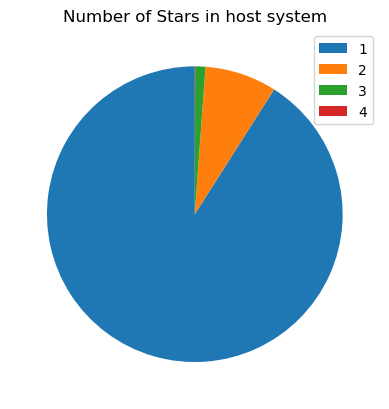

In [185]:
plt.pie(df_planet["Num Stars"].value_counts(), startangle = 90)
plt.title("Number of Stars in host system")
plt.legend(labels = df_planet["Num Stars"].value_counts().index)
plt.show()

To my surprise, *91%* of the exoplanets discovered are part of single-star systems. After doing some research, I discovered that the reason for this is the fact that the transit and radial velocity methods are much harder to apply to multi-star systems because of their complicated dynamics. Another reason may be selection bias, as the radial velocity method is best at detecting massive planets which orbit close to their host stars (these are known as *'Hot Jupiters'*), which are more common in single-star systems.

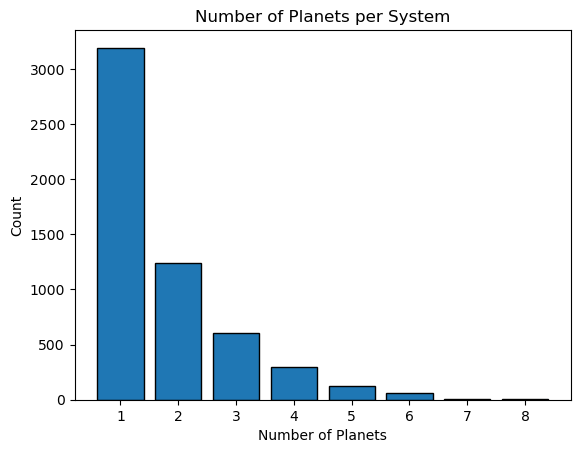

In [409]:
num_planets = df_planet["Num Planets"].value_counts()

plt.bar(num_planets.index, num_planets, edgecolor = "black")

plt.xlabel("Number of Planets")
plt.ylabel("Count")
plt.title("Number of Planets per System")

plt.show()

### Orbits

###  Circumbinary Orbits

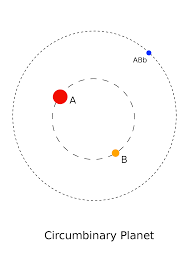

In [186]:
df_planet["Circumbinary"].value_counts()

False    5493
True       43
Name: Circumbinary, dtype: int64

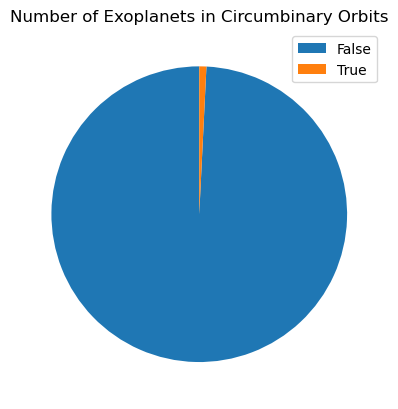

In [187]:
plt.pie(df_planet["Circumbinary"].value_counts(), startangle = 90)
plt.title("Number of Exoplanets in Circumbinary Orbits")
plt.legend(labels = df_planet["Circumbinary"].value_counts().index)
plt.show()

### Orbital Period

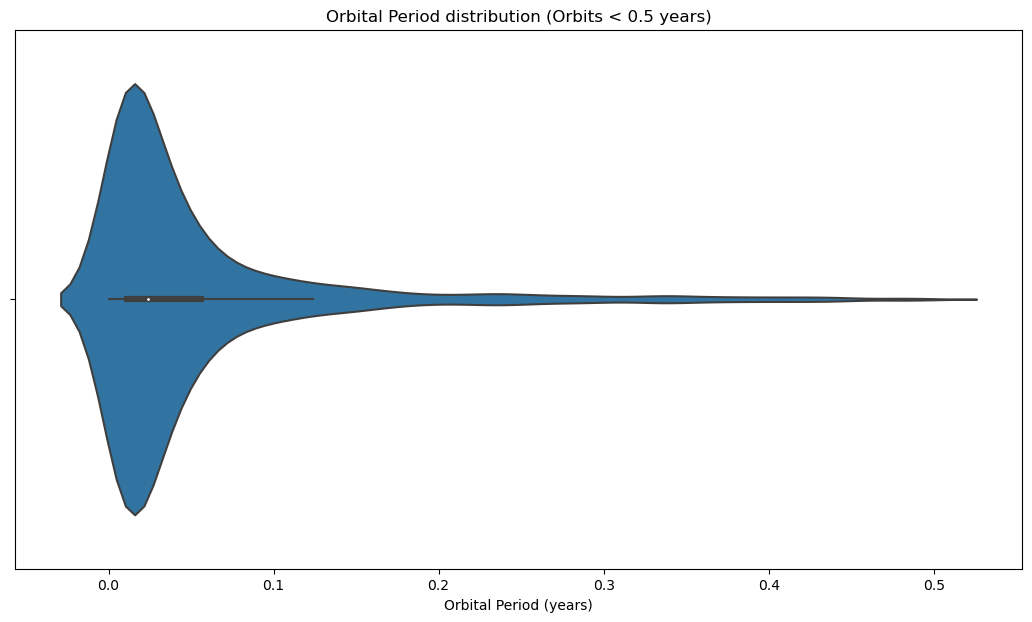

In [337]:
plt.figure(figsize = (13, 7))
sns.violinplot(x = df_planet[df_planet["Orbital Period (years)"] < 0.5]["Orbital Period (years)"], data = df_planet)
plt.title("Orbital Period distribution (Orbits < 0.5 years)")
plt.show()

Interestingly, there are only 14 planets with orbital periods of more than 100 years:

In [309]:
df_planet[df_planet["Orbital Period (years)"] > 100]

,Planet Name,Host Name,Num Stars,Num Planets,Circumbinary,Discovery Method,Discovery Year,Discovery Facility,Controversial,Orbital Period (years),Planet Radius (Earth Radii),Planet Mass (Earth Mass),Distance (lightyear)
79,CFHTWIR-Oph 98 b,CFHTWIR-Oph 98 A,1,1,False,Imaging,2021,Hubble Space Telescope,0,2.201279e+04,20.849,2479.06157,NaN
82,COCONUTS-2 b,COCONUTS-2 A,1,1,False,Imaging,2021,NASA Infrared Telescope Facility (IRTF),0,1.100640e+06,12.442,2002.31896,35.506679
494,HD 105618 c,HD 105618,1,2,False,Radial Velocity,2022,Multiple Observatories,0,2.111313e+02,11.900,8419.59233,228.582403
679,HD 153557 d,HD 153557,1,3,False,Radial Velocity,2022,Multiple Observatories,0,1.113087e+02,11.900,8725.66109,58.516354
1292,HIP 75056 A b,HIP 75056 A,2,1,False,Imaging,2021,Paranal Observatory,0,1.286817e+02,22.418,7945.71018,408.386826
1297,HIP 81208 C b,HIP 81208 C,3,1,False,Imaging,2023,Paranal Observatory,0,2.850164e+02,12.300,4703.86042,481.188174
1318,HR 8799 b,HR 8799,1,4,False,Imaging,2008,Gemini Observatory,0,4.654446e+02,13.000,2000.00000,134.520231
1319,HR 8799 c,HR 8799,1,4,False,Imaging,2008,Gemini Observatory,0,1.889157e+02,13.000,3000.00000,134.520231
1320,HR 8799 d,HR 8799,1,4,False,Imaging,2008,W. M. Keck Observatory,0,1.013026e+02,13.000,3000.00000,134.520231
4908,Oph 11 b,Oph 11,1,1,False,Imaging,2006,Gemini Observatory,0,1.998674e+04,12.300,4449.62000,444.112657


### Planet Parameters

In [271]:
df_planet_sorted = df_planet.sort_values
df_planet["Planet Mass (Earth Mass)"].head()

0    4914.89849
1    4684.81420
2    1131.15130
3    2559.47216
4     565.73740
Name: Planet Mass (Earth Mass), dtype: float64

Text(0.5, 0, 'Planet Radius (Earth Radius)')

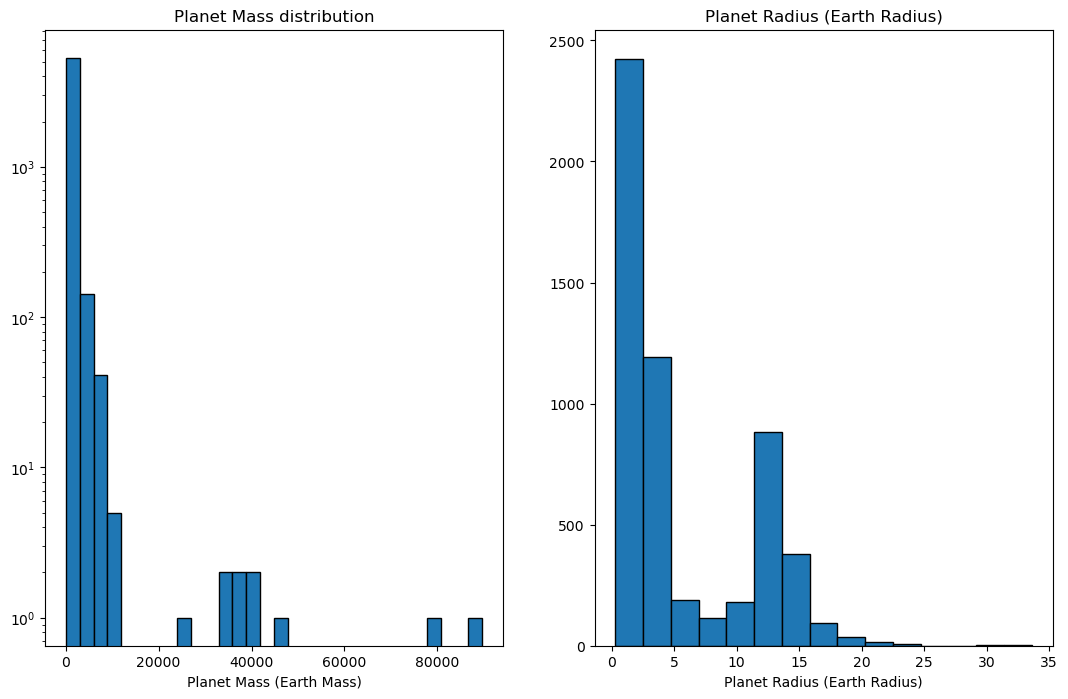

In [44]:
plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)
plt.hist(df_planet["Planet Mass (Earth Mass)"], bins = 30, edgecolor = "black")
plt.title("Planet Mass distribution")
plt.xlabel("Planet Mass (Earth Mass)")
plt.yscale("log")

plt.subplot(1, 2, 2)
plt.hist(df_planet["Planet Radius (Earth Radii)"], edgecolor = "black", bins = 15)
plt.title("Planet Radius (Earth Radius)")
plt.xlabel("Planet Radius (Earth Radius)")

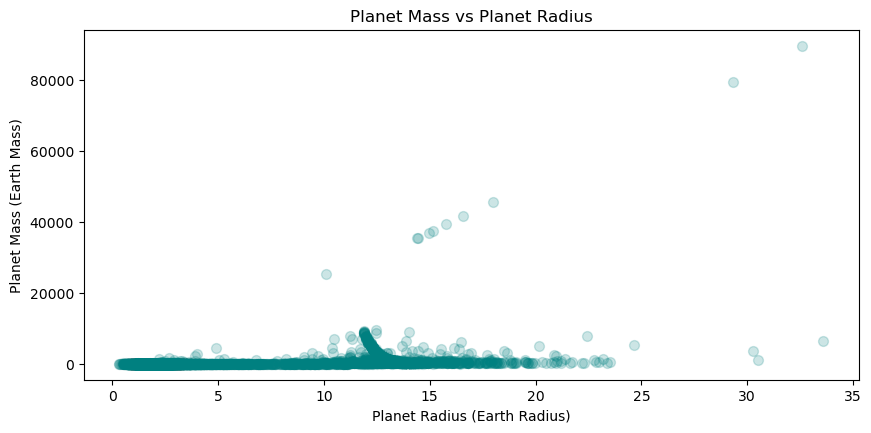

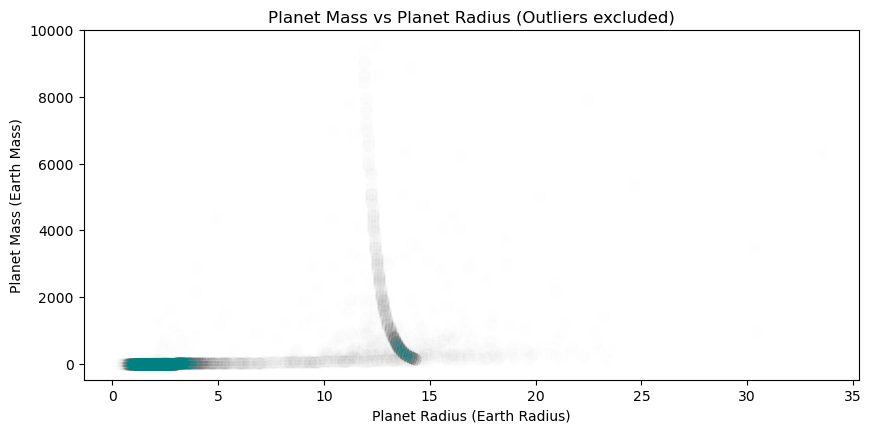

In [370]:
radius = df_planet["Planet Radius (Earth Radii)"]
mass = df_planet["Planet Mass (Earth Mass)"]

plt.figure(figsize = (10, 10))
plt.subplot(2, 1, 1)
plt.scatter(radius, mass, alpha = 0.2, s = 50, c = 'Teal')
plt.title("Planet Mass vs Planet Radius")
plt.xlabel("Planet Radius (Earth Radius)")
plt.ylabel("Planet Mass (Earth Mass)")
plt.show()


plt.figure(figsize = (10, 10))
plt.subplot(2, 1, 2)
plt.scatter(df_planet[mass < 20000]["Planet Radius (Earth Radii)"],
            df_planet[mass < 20000]["Planet Mass (Earth Mass)"], 
            alpha = 0.005, s = 70, c = 'Teal')
plt.title("Planet Mass vs Planet Radius (Outliers excluded)")
plt.xlabel("Planet Radius (Earth Radius)")
plt.ylabel("Planet Mass (Earth Mass)")
plt.show()

By setting the alpha value extremely low, it becomes clear that the exoplanets fall into two distinct groups.

### Distance

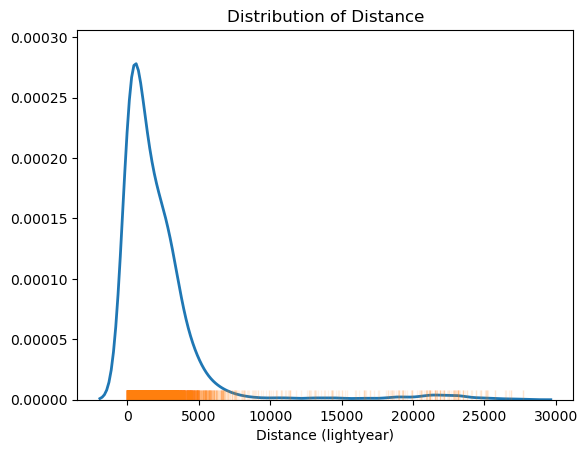

In [386]:
sns.kdeplot(data = df_planet, x = "Distance (lightyear)", linewidth = 2)
sns.rugplot(data = df_planet, x = "Distance (lightyear)", alpha = 0.1)

plt.ylabel("")
plt.title("Distribution of Distance")
plt.show()